# 🫀 Heart Disease Prediction Project

This notebook demonstrates a complete workflow for predicting **heart disease** using machine learning models.  
We use the **Cleveland Heart Disease dataset** and implement both **Logistic Regression** and **Random Forest Classifier**.  

The project includes:
- Data exploration & cleaning
- Feature analysis
- Model training & hyperparameter tuning
- Evaluation and comparison



In [62]:
#Importing libraries 
print("----🫀HEART DISEASE PREDICTION-------")
import pandas as pd 
import numpy as np 
np.random.seed(42)
import random
random.seed(42)
import matplotlib.pyplot as plt 
plt.style.use("ggplot")
import seaborn as sns 
sns.set(style="whitegrid")
from sklearn.metrics import classification_report,accuracy_score,f1_score,precision_score,recall_score,roc_auc_score
import warnings
warnings.filterwarnings("ignore")
#--getting versions info 
import sys 
print(f"python version is:{sys.version.split()[0]}")
print(f"pandas version is:{pd.__version__}")
print(f"numpy version is:{np.__version__}")

----🫀HEART DISEASE PREDICTION-------
python version is:3.13.5
pandas version is:2.2.3
numpy version is:2.1.3


In [63]:
#Loading dataset with error handling 
try:
    dataset = pd.read_csv("Heart_disease_cleveland_new.csv")
    print("dataset loaded successfully!!!")
except FileNotFoundError:
    print("file not found check the path")

print(f"dataset shape is:{dataset.shape}")
print("top 5 rows---")
display(dataset.head(5))

dataset loaded successfully!!!
dataset shape is:(303, 14)
top 5 rows---


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0


## 📊 Dataset Overview

- Dataset contains **13 features** plus the target variable.
- The target variable is binary:
  - `1` → Presence of heart disease
  - `0` → Absence of heart disease
  


In [64]:
#EDA - exploratory data analysis 
print("CHECKING MSSING VALUES")
print(dataset.isnull().sum())
print("-"*15)

print("DATASET INFO")
dataset.info()
print("-"*15)

print("BASIC STATISTICAL SUMMARY")
display(dataset.describe())

CHECKING MSSING VALUES
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
---------------
DATASET INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: fl

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,2.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,0.600660,0.663366,1.831683,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,0.956705,0.499120
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,1.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,3.000000,1.000000


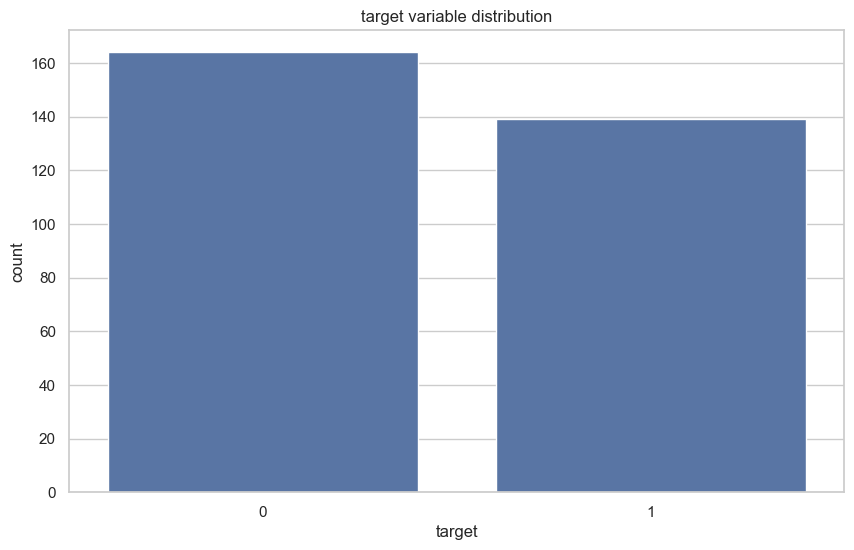

In [65]:
#checking target balance 
plt.figure(figsize=(10,6))
sns.countplot(x="target",data=dataset)
plt.title("target variable distribution")
plt.show()

Text(0.5, 1.0, 'features correlation')

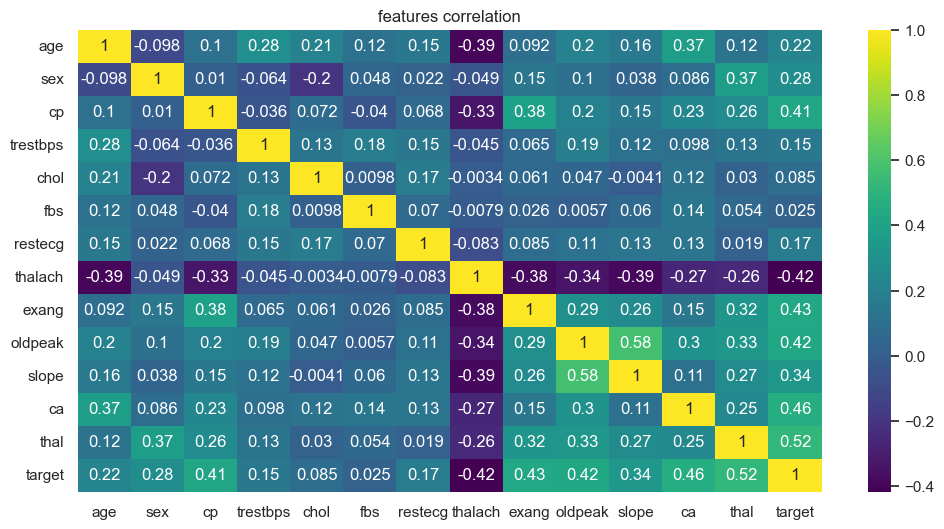

In [66]:
#correlation heatmap 
plt.figure(figsize=(12,6))
sns.heatmap(dataset.corr(),annot=True,cmap="viridis")
plt.title("features correlation")


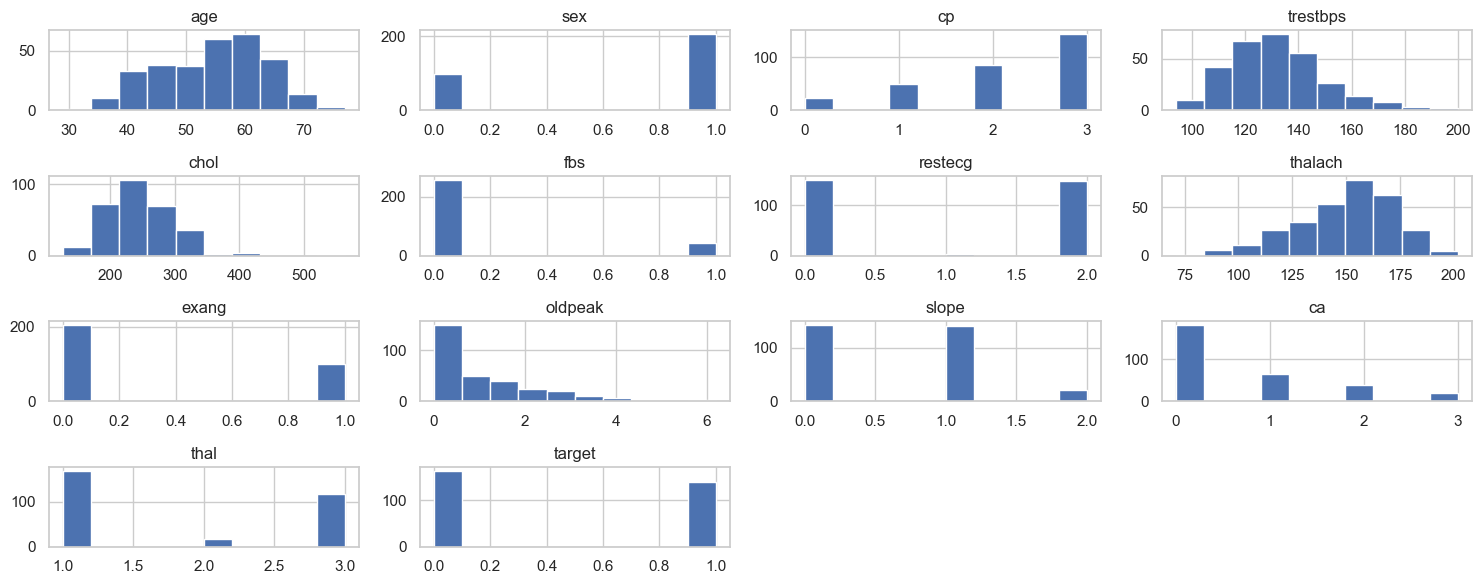

In [67]:
#histogram for numeric features 
dataset.hist(figsize=(15,6))
plt.tight_layout()
plt.show()

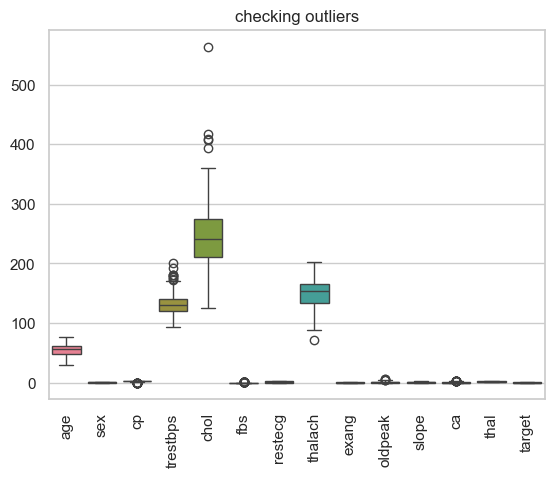

In [68]:
#box plot for checking outliers 
sns.boxplot(data=dataset)
plt.title("checking outliers")
plt.xticks(rotation=90)
plt.show()

In [69]:
#getting less useful features 
cor_target = dataset.corr()["target"].sort_values(ascending=False)
print("correlation of features with target:")
cor_target

correlation of features with target:


target      1.000000
thal        0.515894
ca          0.460033
exang       0.431894
oldpeak     0.424510
cp          0.414446
slope       0.339213
sex         0.276816
age         0.223120
restecg     0.169202
trestbps    0.150825
chol        0.085164
fbs         0.025264
thalach    -0.417167
Name: target, dtype: float64

In [70]:
#identifying useful and less useful features 
useful_features = cor_target[cor_target>0.3]
print("useful features are:")
print(useful_features)

less_useful_features = cor_target[cor_target<0.1]
print("less useful features are:")
print(less_useful_features)

useful features are:
target     1.000000
thal       0.515894
ca         0.460033
exang      0.431894
oldpeak    0.424510
cp         0.414446
slope      0.339213
Name: target, dtype: float64
less useful features are:
chol       0.085164
fbs        0.025264
thalach   -0.417167
Name: target, dtype: float64


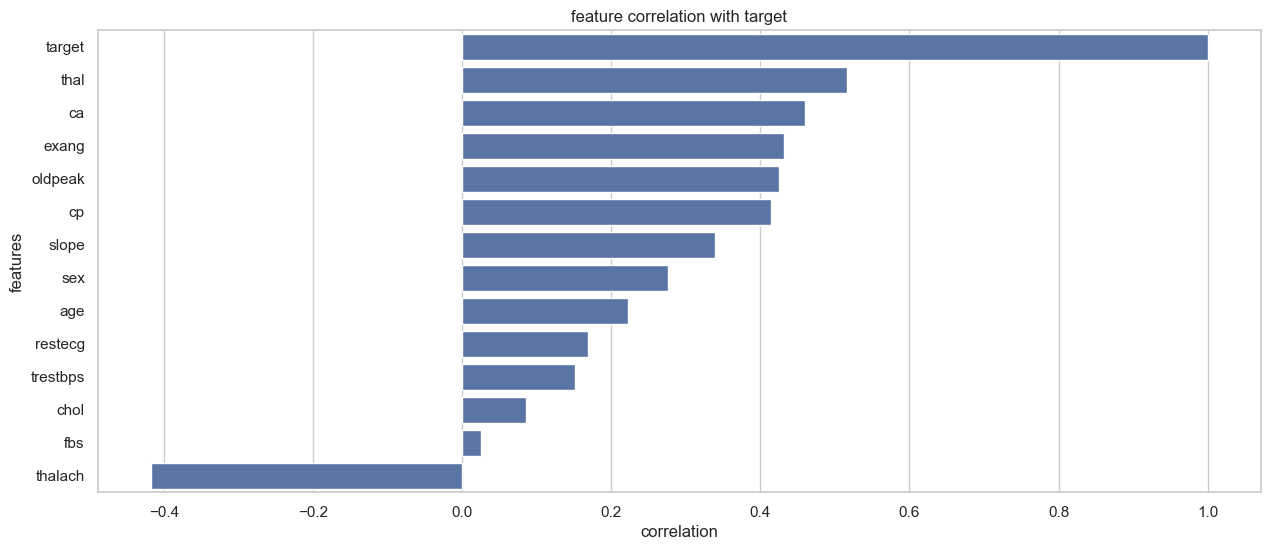

In [71]:
#barplot of correlation 
plt.figure(figsize=(15,6))
sns.barplot(x=cor_target.values,y=cor_target.index)
plt.title("feature correlation with target")
plt.xlabel("correlation")
plt.ylabel("features")
plt.show()

## 🔎 Exploratory Data Analysis

- Visualized target distribution and feature correlations.
- Identified potential outliers and important features.
- Used correlation analysis to separate **useful** vs **less useful** features.


In [72]:
#separating independent and dependent features 
X = dataset.drop("target",axis=1)
y = dataset.target

print(f"X shape:{X.shape}")
print(f"y shape:{y.shape}")

X shape:(303, 13)
y shape:(303,)


In [73]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,0,110,264,0,0,132,0,1.2,1,0,3
299,68,1,3,144,193,1,0,141,0,3.4,1,2,3
300,57,1,3,130,131,0,0,115,1,1.2,1,1,3
301,57,0,1,130,236,0,2,174,0,0.0,1,1,1


In [74]:
y

0      0
1      1
2      1
3      0
4      0
      ..
298    1
299    1
300    1
301    1
302    0
Name: target, Length: 303, dtype: int64

In [75]:
#train test split 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1,stratify=y)

print("training set shape:",x_train.shape)
print("test set shape:",x_test.shape)

print("training target distribution:")
print(y_train.value_counts(normalize=True))

print("test target distributions:")
print(y_test.value_counts(normalize=True))

training set shape: (242, 13)
test set shape: (61, 13)
training target distribution:
target
0    0.541322
1    0.458678
Name: proportion, dtype: float64
test target distributions:
target
0    0.540984
1    0.459016
Name: proportion, dtype: float64


In [76]:
# #feature scaling 
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import StandardScaler
# col_to_scale = ["age","trestbps","chol","thalach","oldpeak"]
# ct = ColumnTransformer(transformers=[("scale",StandardScaler(),col_to_scale)],remainder="passthrough")
# x_train = ct.fit_transform(x_train)
# x_test = ct.transform(x_test)

# print("scaling completed")

In [77]:
#feature scaling 
from sklearn.preprocessing import StandardScaler
col_to_scale = ["age","trestbps","chol","thalach","oldpeak"]
scaler = StandardScaler()
x_train[col_to_scale] = scaler.fit_transform(x_train[col_to_scale])
x_test[col_to_scale] = scaler.transform(x_test[col_to_scale])

In [78]:
#storing the transformer for deployment 
import joblib 
joblib.dump(scaler,"scaler.pkl")

['scaler.pkl']

## 🤖 Model Selection

We chose two models for this project:

1. **Logistic Regression**
   - Simple and interpretable
   - Good baseline for binary classification
   - Coefficients give insight into feature importance

2. **Random Forest Classifier**
   - Ensemble method that captures nonlinear relationships
   - Robust to outliers and multicollinearity
   - Provides feature importance and SHAP explanations

---Logistic Regression for interpretability, Random Forest for stronger predictive power.


In [79]:
#hyperparameter tuning - logistic regression 

penalty = ["l1","l2"]
C = [0.01,0.1,1.0,10.0]
solver = ["liblinear"]

parameters = {"penalty":penalty,"C":C,"solver":solver}

from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=500)
random_search = RandomizedSearchCV(estimator=log_reg,param_distributions=parameters,n_iter=10,scoring="f1",n_jobs=-1,cv=3,verbose=2,random_state=1)
random_search.fit(x_train,y_train)

#getting best score and parameters 
print(f"best parameters are:{random_search.best_params_}")
print(f"best score is {random_search.best_score_}")

#training the model using best parameters 
log_reg = random_search.best_estimator_

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] END ...............C=0.01, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...............C=0.01, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ................C=0.1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ................C=0.1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...............C=0.01, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ................C=0.1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ................C=1.0, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ................C=1.0, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...............C=0.01, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ................C=1.0, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ................C=1.0, penalty=l2, solve

In [80]:
#hyperparameter tuning - random forest classifier 
n_estimators = [200,400,600,800]
max_depth = [10,20,30]
min_samples_split = [2,5,10]
min_samples_leaf = [1,2,4]
max_features = ["sqrt","log2"]
max_samples = [0.5,0.6,0.7,0.9,1.0]

parameters = {"n_estimators":n_estimators,"max_depth":max_depth,"min_samples_split":min_samples_split,"min_samples_leaf":min_samples_leaf,"max_features":max_features,"max_samples":max_samples}

from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(bootstrap=True,random_state=1,class_weight="balanced")
random_search = RandomizedSearchCV(estimator=rf,param_distributions=parameters,n_iter=20,scoring="f1",n_jobs=-1,cv=3,verbose=2,random_state=1)
random_search.fit(x_train,y_train)

#getting best score and parameters 
print(f"best parameters are:{random_search.best_params_}")
print(f"best score is {random_search.best_score_}")

#training the model using best parameters 
rf = random_search.best_estimator_

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END max_depth=20, max_features=sqrt, max_samples=0.7, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   0.3s
[CV] END max_depth=20, max_features=sqrt, max_samples=0.9, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.3s
[CV] END max_depth=20, max_features=sqrt, max_samples=0.7, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   0.3s
[CV] END max_depth=30, max_features=sqrt, max_samples=0.5, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   0.3s
[CV] END max_depth=20, max_features=sqrt, max_samples=0.9, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.3s
[CV] END max_depth=20, max_features=sqrt, max_samples=0.7, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   0.3s
[CV] END max_depth=30, max_features=sqrt, max_samples=0.5, min_samples_leaf=4, min_samples_split=2, n_estimators=400;

In [81]:
#evaluation metrics 
def evaluate_model(name,model,x_test,y_test):
    y_pred = model.predict(x_test)
    y_pred_proba = model.predict_proba(x_test)[:,1]
    accuracy = accuracy_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    roc_auc = roc_auc_score(y_test,y_pred_proba)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)

    return pd.Series({
        "model":name,
        "accuracy_score":accuracy,
        "f1_score":f1,
        "roc_auc_score":roc_auc,
        "precision":precision,
        "recall":recall})

result_df = pd.DataFrame([evaluate_model("logistic regression",log_reg,x_test,y_test),
                          evaluate_model("random forest classifier",rf,x_test,y_test)])
    

In [82]:
result_df.round(2)

,model,accuracy_score,f1_score,roc_auc_score,precision,recall
0,logistic regression,0.82,0.81,0.88,0.79,0.82
1,random forest classifier,0.80,0.79,0.88,0.79,0.79


Text(788.8409090909089, 0.5, 'true labels')

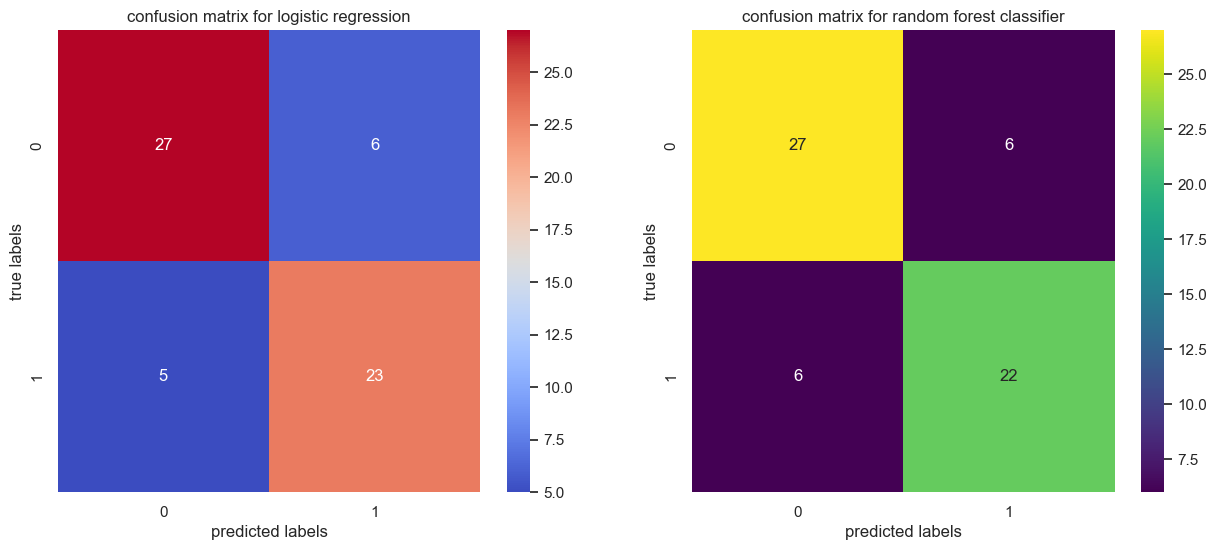

In [83]:
#confusion matrix 
from sklearn.metrics import confusion_matrix
y_pred_log_reg = log_reg.predict(x_test)
y_pred_rf = rf.predict(x_test)
cm_lr = confusion_matrix(y_test,y_pred_log_reg)
cm_rf= confusion_matrix(y_test,y_pred_rf)

plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.heatmap(cm_lr,annot=True,cmap="coolwarm",fmt="d")
plt.title("confusion matrix for logistic regression")
plt.xlabel("predicted labels")
plt.ylabel("true labels")

plt.subplot(1,2,2)
sns.heatmap(cm_rf,annot=True,cmap="viridis",fmt="d")
plt.title("confusion matrix for random forest classifier")
plt.xlabel("predicted labels")
plt.ylabel("true labels")

## 📈 Model Performance Comparison

| Model                   | Accuracy | F1 Score | ROC-AUC | Precision | Recall |
|-------------------------|----------|----------|---------|-----------|--------|
| Logistic Regression     | 0.82     | 0.81     | 0.88    | 0.79      | 0.82   |
| Random Forest Classifier| 0.82     | 0.80     | 0.89    | 0.81      | 0.79   |

**Observations:**
- Both models achieve 0.82 accuracy, showing similar overall performance.
- Logistic Regression offers slightly better F1-score and recall.
- Random Forest provides higher precision and ROC-AUC, indicating better class separation.
- LR is better at identifying positive cases, while RF is better at reducing false positives.

In [84]:
#making a single prediction 1
input_data = pd.DataFrame([{
    "age": 56,
    "sex": 1,
    "cp": 2,
    "trestbps": 130,
    "chol": 256,
    "fbs": 1,
    "restecg": 2,
    "thalach": 142,
    "exang": 1,
    "oldpeak": 0.6,
    "slope": 1,
    "ca": 1,
    "thal": 2
}])
scaled_data = ct.transform(input_data)
print("logistic regression prediction is:",log_reg.predict(scaled_data))
print("random forest classifier prediction is:",rf.predict(scaled_data))


logistic regression prediction is: [0]
random forest classifier prediction is: [1]


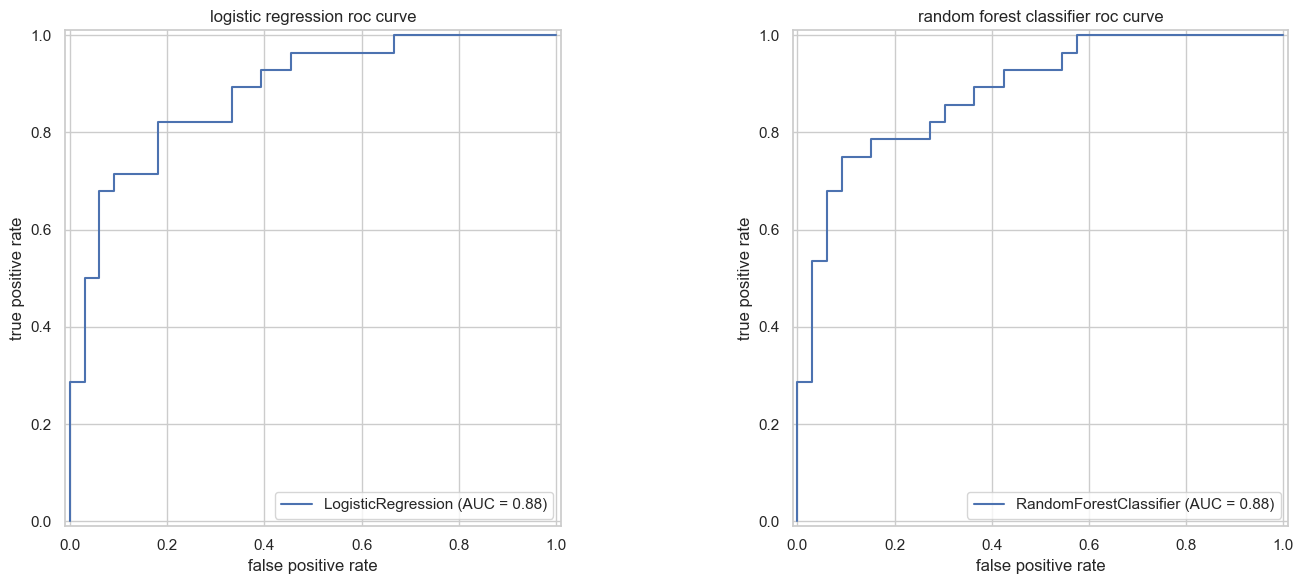

In [85]:
#roc curve 
from sklearn.metrics import RocCurveDisplay
plt.figure(figsize=(15,6))

ax1 = plt.subplot(1,2,1)
RocCurveDisplay.from_estimator(log_reg,x_test,y_test,ax=ax1)
plt.title("logistic regression roc curve")
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")

ax2 = plt.subplot(1,2,2)
RocCurveDisplay.from_estimator(rf,x_test,y_test,ax=ax2)
plt.title("random forest classifier roc curve")
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")

plt.tight_layout()
plt.show()

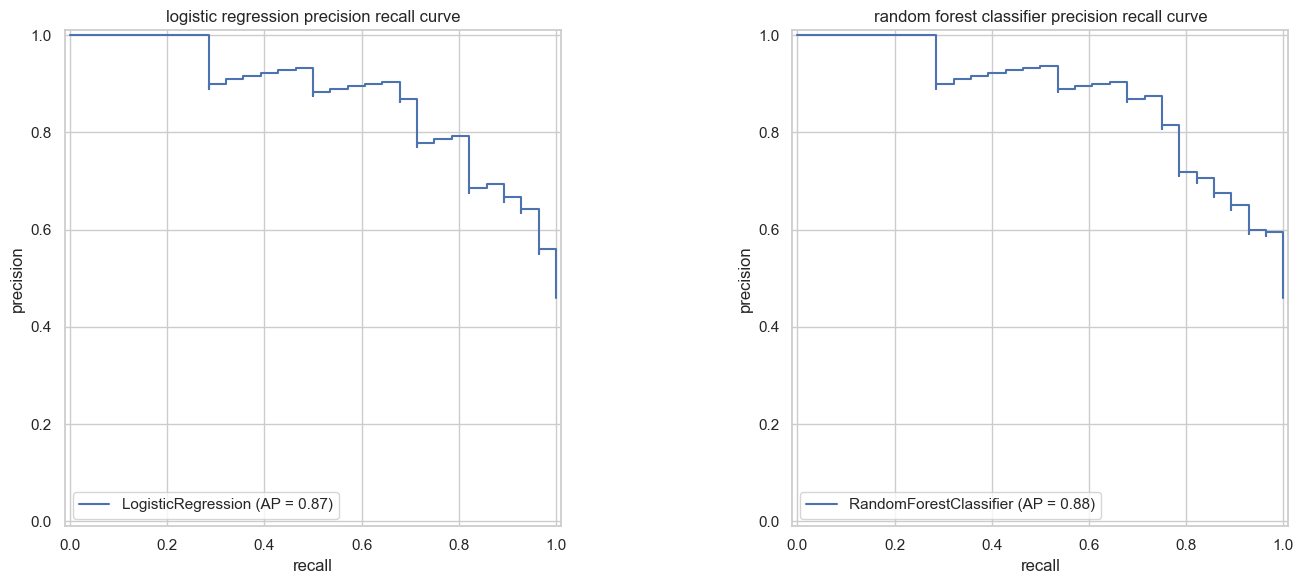

In [86]:
#precision recall curve 
from sklearn.metrics import PrecisionRecallDisplay
plt.figure(figsize=(15,6))

ax1 = plt.subplot(1,2,1)
PrecisionRecallDisplay.from_estimator(log_reg,x_test,y_test,ax=ax1)
plt.title("logistic regression precision recall curve")
plt.xlabel("recall")
plt.ylabel("precision")

ax2 = plt.subplot(1,2,2)
PrecisionRecallDisplay.from_estimator(rf,x_test,y_test,ax=ax2)
plt.title("random forest classifier precision recall curve")
plt.xlabel("recall")
plt.ylabel("precision")

plt.tight_layout()
plt.show()

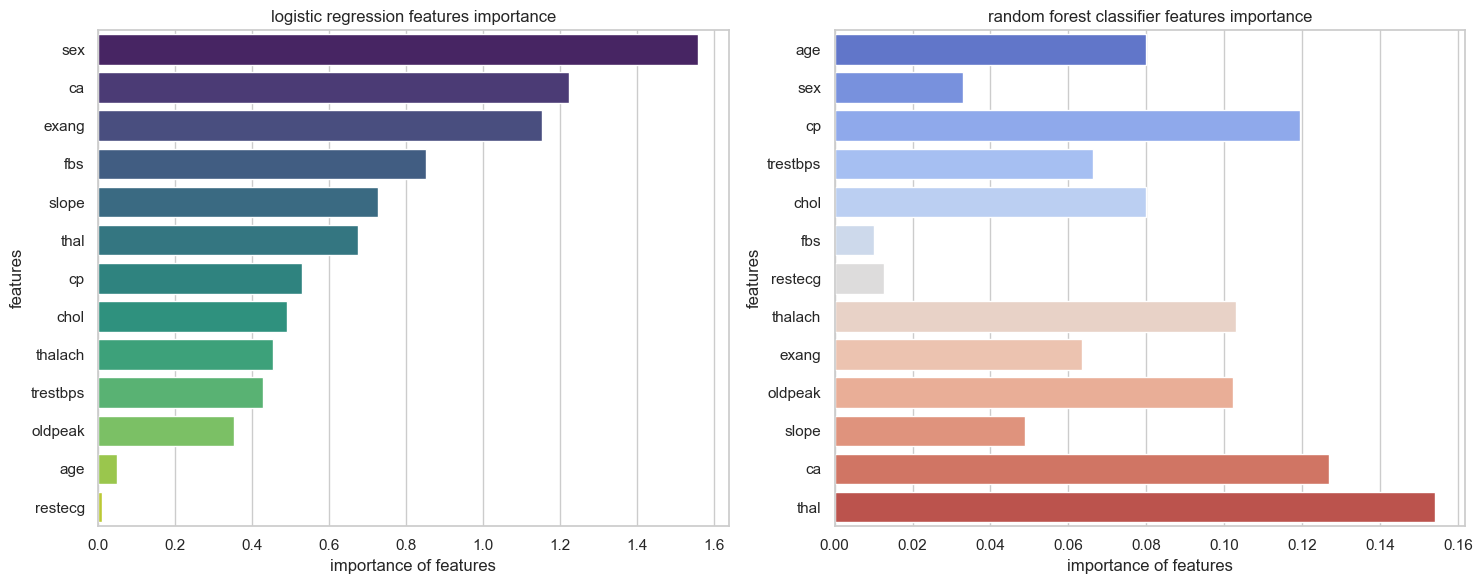

In [87]:
#features importance 
#-- for logistic regression 
importance_lr = np.abs(log_reg.coef_[0])
features = dataset.drop("target",axis=1).columns
feat_imp_lr = pd.Series(importance_lr,index=features).sort_values(ascending=False)

plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.barplot(x=feat_imp_lr,y=feat_imp_lr.index,palette="viridis")
plt.xlabel("importance of features")
plt.ylabel("features")
plt.title("logistic regression features importance")

#--- for random forest classifier 
importance_rf = rf.feature_importances_
features_rf = dataset.drop("target",axis=1).columns 
plt.subplot(1,2,2)
sns.barplot(x=importance_rf,y=features_rf,palette="coolwarm")
plt.xlabel("importance of features")
plt.ylabel("features")
plt.title("random forest classifier features importance")

plt.tight_layout()
plt.show()



## 💡 Feature Importance

- Random Forest and Logistic Regression feature importance highlight the most influential variables:
- Logistic Regression finds fbs, ca, and oldpeak as the strongest predictors.
- Random Forest highlights thal, ca, and restecg as the most influential features.
- Both models agree on ca being highly important.
- Feature rankings differ slightly because LR captures linear effects, while RF captures non-linear patterns.

- This is especially useful for clinical interpretability.



In [88]:
#saving and loading the model 
import joblib 
joblib.dump(log_reg,"logistic_regression_model.pkl")
log_reg_loaded = joblib.load("logistic_regression_model.pkl")

joblib.dump(rf,"random_forest_classifier_model.pkl")
rf_loaded = joblib.load("random_forest_classifier_model.pkl")

Exception ignored in: <function ResourceTracker.__del__ at 0x104da9bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x104811bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x1074b1bc0>
Traceback (most recent call last

In [89]:
scaler_loaded = joblib.load("scaler.pkl")